In [3]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [6]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [7]:
coverage_df

,0.2,0.4,0.6,0.8,Tree val,Naive
0,1.00,1.00,1.00,0.250000,1.000000,0.750000
1,0.75,0.75,0.75,1.000000,1.000000,1.000000
2,1.00,1.00,0.75,0.750000,1.000000,1.000000
3,1.00,1.00,1.00,0.333333,1.000000,0.333333
4,1.00,1.00,1.00,1.000000,1.000000,0.750000
...,...,...,...,...,...,...
45,1.00,1.00,0.25,0.250000,1.000000,1.000000
46,1.00,0.75,1.00,1.000000,1.000000,0.750000
47,0.75,1.00,1.00,0.750000,0.666667,0.666667
48,1.00,1.00,1.00,0.500000,1.000000,1.000000


In [8]:
length_df

,0.2,0.4,0.6,0.8,Tree val,Naive
0,6.809296,6.668862,9.468544,10.690052,9.446893,2.374976
1,6.507844,5.004631,5.724051,6.864100,51.041103,2.380524
2,13.292959,13.020901,11.935060,7.411236,14.113655,2.311606
3,8.794189,8.438338,7.737468,21.167206,4.702656,2.763298
4,6.943650,8.499152,11.332088,11.056440,5.072773,2.446418
...,...,...,...,...,...,...
45,9.809333,11.983303,18.220142,10.552009,25.693863,1.826891
46,9.873125,11.090147,11.424063,6.141037,4.118686,2.173138
47,4.958984,10.852452,11.112091,6.652761,8.036237,1.838151
48,11.492097,12.807426,6.796281,10.018156,11.972986,2.112253


In [9]:
MSE_df

,0.2,0.4,0.6,0.8,Tree val,Naive
0,4.165064,4.165064,4.061124,4.165064,3.732954,3.732954
1,4.526169,5.146498,4.515858,5.471503,4.999033,4.999033
2,4.725472,4.725472,5.520765,5.520765,4.725472,4.725472
3,6.766394,6.766394,6.766394,6.781073,6.766394,6.766394
4,5.395052,5.641457,5.123624,5.375851,5.641457,5.641457
...,...,...,...,...,...,...
45,4.046145,4.046145,4.082926,4.046145,4.269164,4.269164
46,4.715816,4.711473,4.711473,4.718174,4.715816,4.715816
47,3.767518,4.238637,3.998976,3.767518,4.117060,4.117060
48,3.431614,3.699349,3.497796,3.510896,3.346639,3.346639


In [10]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,300)
        elif metric == "MSE":
            axes[i].set_ylim(0,50)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.2         0.956500
0.4         0.949833
0.6         0.916500
0.8         0.859667
Tree val    0.901500
Naive       0.754333
dtype: float64
Length :
 0.2         11.866329
0.4         11.905116
0.6         13.128018
0.8         12.320663
Tree val    22.064417
Naive        2.247075
dtype: float64
MSE :
 0.2         4.768593
0.4         4.773097
0.6         4.770549
0.8         4.767096
Tree val    4.719548
Naive       4.719548
dtype: float64


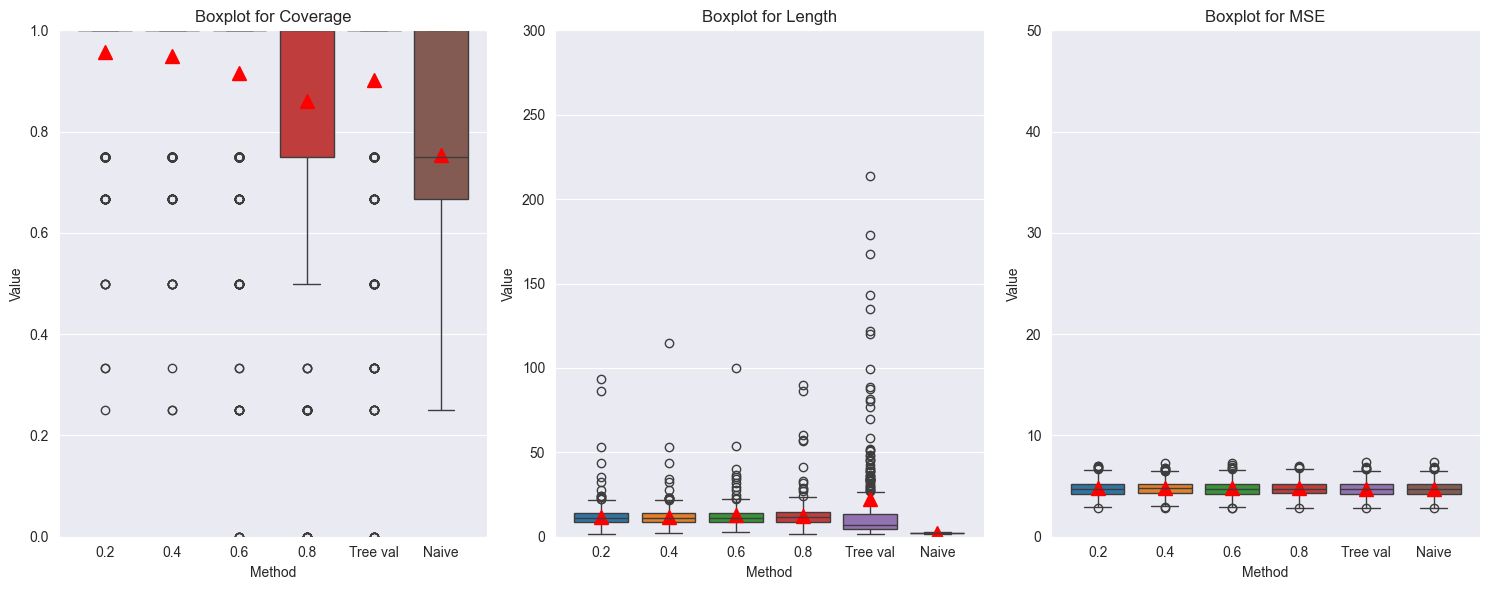

In [11]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])